In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, recall_score, precision_score
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df1 = pd.read_csv('dataset1.csv')
df1.columns = [i for i in range(df1.shape[1])]
print(df1)

            0         1             2         3         4         5   \
0     0.349498  0.826143  1.066313e-07  0.306239  0.656108  0.013028   
1     0.472647  0.896501  2.067354e-07  0.392826  0.752868  0.019346   
2     0.524990  0.862376  3.660116e-07  0.444633  0.730585  0.016207   
3     0.548408  0.810290  2.713539e-07  0.473373  0.685153  0.015370   
4     0.543098  0.752171  3.433458e-07  0.475876  0.626846  0.015930   
...        ...       ...           ...       ...       ...       ...   
3494  0.587240  0.714625  4.880537e-08  0.543071  0.670388 -0.035543   
3495  0.596479  0.724293  3.263303e-08  0.558519  0.658810 -0.037890   
3496  0.589987  0.700585  4.102703e-08  0.548981  0.641428 -0.035801   
3497  0.587803  0.698046  1.956961e-09  0.548227  0.639978 -0.034276   
3498  0.585038  0.706551  1.902602e-08  0.541717  0.655750 -0.032917   

            6         7         8         9   ...        54        55  \
0     0.326493  0.517997  0.012358  0.378922  ...  0.576301  0

In [3]:
df1 = df1.rename(columns={63: 'Output'})
df1

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,Output
0,0.349498,0.826143,1.066313e-07,0.306239,0.656108,0.013028,0.326493,0.517997,0.012358,0.378922,...,0.576301,0.514938,-0.095406,0.623693,0.472287,-0.100893,0.661667,0.435043,-0.102713,BACKWARD
1,0.472647,0.896501,2.067354e-07,0.392826,0.752868,0.019346,0.385351,0.604354,0.022709,0.415411,...,0.641221,0.494370,-0.091118,0.681171,0.435704,-0.095642,0.714436,0.387905,-0.095028,BACKWARD
2,0.524990,0.862376,3.660116e-07,0.444633,0.730585,0.016207,0.439022,0.583050,0.018615,0.471256,...,0.701905,0.476731,-0.090611,0.744170,0.414564,-0.094613,0.777079,0.364793,-0.093252,BACKWARD
3,0.548408,0.810290,2.713539e-07,0.473373,0.685153,0.015370,0.468070,0.546303,0.018255,0.498452,...,0.703725,0.434709,-0.078506,0.737753,0.376979,-0.083292,0.764058,0.328476,-0.083914,BACKWARD
4,0.543098,0.752171,3.433458e-07,0.475876,0.626846,0.015930,0.468835,0.502229,0.019403,0.498775,...,0.687180,0.404743,-0.069567,0.717390,0.348315,-0.073240,0.739336,0.300425,-0.072833,BACKWARD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3494,0.587240,0.714625,4.880537e-08,0.543071,0.670388,-0.035543,0.521768,0.582610,-0.054661,0.544437,...,0.642816,0.460380,-0.063203,0.632264,0.513554,-0.054312,0.621422,0.556185,-0.038792,UP
3495,0.596479,0.724293,3.263303e-08,0.558519,0.658810,-0.037890,0.541979,0.569386,-0.056360,0.567318,...,0.659460,0.464084,-0.056260,0.647501,0.517362,-0.048996,0.637351,0.561067,-0.034003,UP
3496,0.589987,0.700585,4.102703e-08,0.548981,0.641428,-0.035801,0.531394,0.555547,-0.054164,0.555023,...,0.645995,0.447888,-0.055687,0.635686,0.494961,-0.048141,0.626101,0.535665,-0.033620,UP
3497,0.587803,0.698046,1.956961e-09,0.548227,0.639978,-0.034276,0.529881,0.552572,-0.052084,0.553477,...,0.648218,0.442358,-0.058395,0.636672,0.492383,-0.050397,0.627222,0.533640,-0.035604,UP


In [4]:
X = df1.iloc[:, :-1]
print("Features shape =", X.shape)

Y = df1.iloc[:, -1]
print("Labels shape =", Y.shape)

Features shape = (3499, 63)
Labels shape = (3499,)


In [5]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(X, Y, test_size=0.2, random_state=0)
svm1 = SVC(C=10, gamma=0.1, kernel='rbf')
svm1.fit(x_train1, y_train1)

SVC(C=10, gamma=0.1)

In [6]:
y_pred1 = svm1.predict(x_test1)
y_pred1

array(['FORWARD', 'DOWN', 'LEFT', 'GRIP', 'LEFT', 'RIGHT', 'UNGRIP',
       'UNGRIP', 'RESET', 'UP', 'FORWARD', 'FORWARD', 'UNGRIP',
       'BACKWARD', 'DOWN', 'FORWARD', 'GRIP', 'GRIP', 'BACKWARD', 'RIGHT',
       'UP', 'LEFT', 'DOWN', 'UP', 'UNGRIP', 'FORWARD', 'RESET', 'DOWN',
       'GRIP', 'UP', 'FORWARD', 'RIGHT', 'GRIP', 'RIGHT', 'UP', 'FORWARD',
       'LEFT', 'RESET', 'RESET', 'RIGHT', 'RESET', 'RESET', 'Go Auto',
       'LEFT', 'BACKWARD', 'BACKWARD', 'UNGRIP', 'GRIP', 'LEFT', 'RESET',
       'UP', 'LEFT', 'RESET', 'RIGHT', 'DOWN', 'FORWARD', 'Go Auto',
       'Go Auto', 'RESET', 'DOWN', 'DOWN', 'Go Auto', 'UP', 'DOWN',
       'DOWN', 'UNGRIP', 'UP', 'LEFT', 'RESET', 'LEFT', 'DOWN', 'DOWN',
       'UP', 'UP', 'DOWN', 'Go Auto', 'DOWN', 'DOWN', 'FORWARD',
       'BACKWARD', 'RIGHT', 'Go Auto', 'BACKWARD', 'RESET', 'Go Auto',
       'BACKWARD', 'DOWN', 'DOWN', 'FORWARD', 'LEFT', 'RESET', 'DOWN',
       'UP', 'FORWARD', 'UNGRIP', 'RESET', 'BACKWARD', 'LEFT', 'BACKWARD',
       '

In [7]:
cf_matrix1 = confusion_matrix(y_test1, y_pred1)
f1_1 = f1_score(y_test1, y_pred1, average='micro')
recall1 = recall_score(y_test1, y_pred1, average='micro')
precision1 = precision_score(y_test1, y_pred1, average='micro')
accuracy1 = accuracy_score(y_test1, y_pred1)
report = classification_report(y_test1, y_pred1)
error1 = 1 - accuracy1
print("F1 Score: {:.2f}%".format(f1_1 * 100.0))
print("Recall: {:.2f}%".format(recall1 * 100.0))
print("Precision: {:.2f}%".format(precision1 * 100.0))
print("Accuracy: {:.2f}%".format(accuracy1 * 100.0))
print("Error: {:.2f}%".format(error1 * 100.0))
print("Report :", report)

F1 Score: 86.86%
Recall: 86.86%
Precision: 86.86%
Accuracy: 86.86%
Error: 13.14%
Report :               precision    recall  f1-score   support

    BACKWARD       1.00      1.00      1.00        68
        DOWN       0.47      1.00      0.64        66
     FORWARD       0.94      0.95      0.95        64
        GRIP       0.98      0.72      0.83        78
     Go Auto       0.96      0.81      0.88        64
        LEFT       1.00      0.83      0.90        86
       RESET       1.00      0.94      0.97        68
       RIGHT       1.00      0.82      0.90        67
      UNGRIP       0.89      0.88      0.89        67
          UP       0.92      0.78      0.84        72

    accuracy                           0.87       700
   macro avg       0.92      0.87      0.88       700
weighted avg       0.92      0.87      0.88       700



In [28]:
import pickle

# save model
with open('model.pkl','wb') as f:
    pickle.dump(svm1,f)

Accuracy: 86.86%
Error: 13.14%


<Axes: title={'center': 'Hand Gesture Recognition Matrix'}>

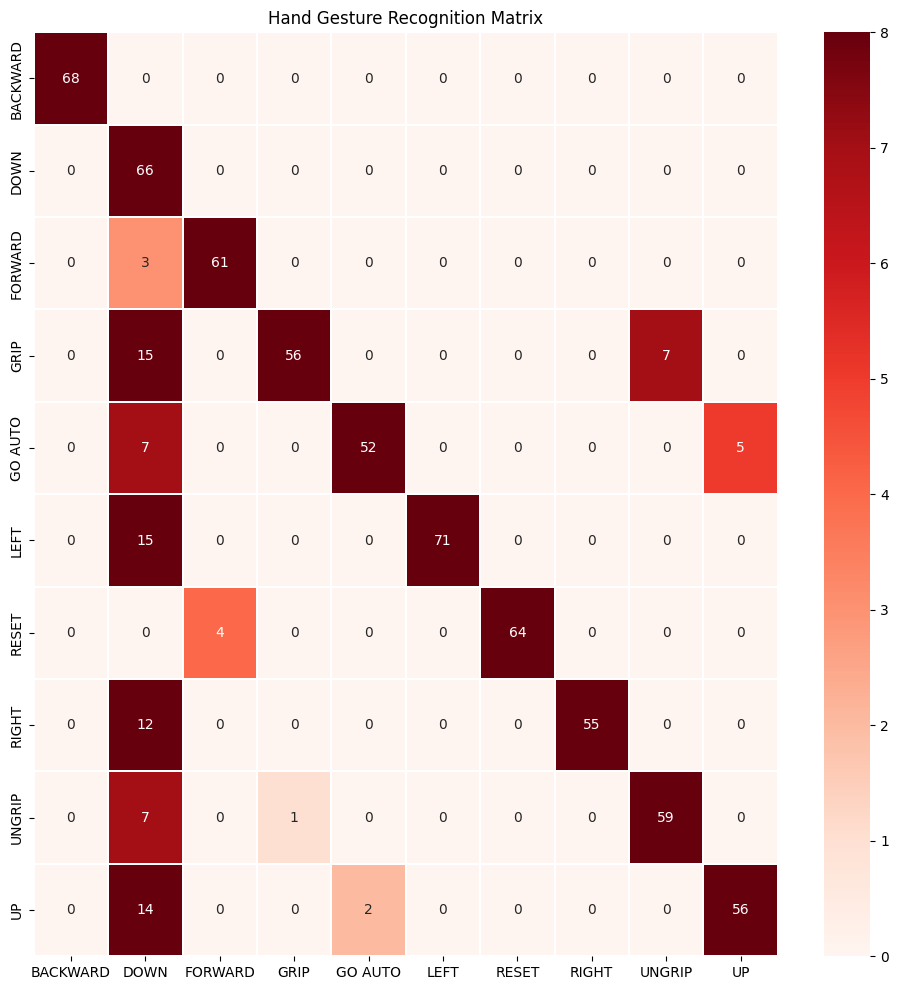

In [8]:
labels1 = sorted(list(set(df1['Output'])))
labels1 = [x.upper() for x in labels1]

fig, ax1 = plt.subplots(figsize=(12, 12))

ax1.set_title("Hand Gesture Recognition Matrix")

maping1 = sns.heatmap(cf_matrix1, 
                     annot=True,
                     cmap=plt.cm.Reds, 
                     linewidths=.2,
                     xticklabels=labels1,
                     yticklabels=labels1,
                     vmax=8,
                     fmt='g',
                     ax=ax1
                    )

# Calculate accuracy and error
total_samples1 = np.sum(cf_matrix1)
correct_predictions1 = np.trace(cf_matrix1)
accuracy1 = correct_predictions1 / total_samples1
error1 = 1 - accuracy1

# Print accuracy and error
print("Accuracy: {:.2f}%".format(accuracy1 * 100))
print("Error: {:.2f}%".format(error1 * 100))

maping1

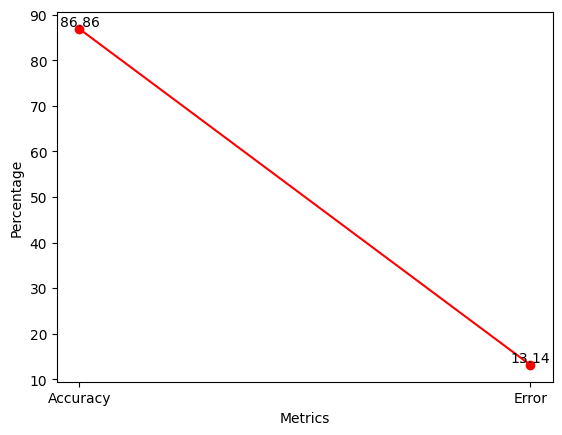

In [9]:
# Create lists for plotting
metrics1 = ["Accuracy", "Error"]
values1 = [accuracy1 * 100, error1 * 100]

# Plot the line graph
plt.plot(metrics1, values1, marker='o', linestyle='-', color='red')

# Add labels to the data points
for i, value in enumerate(values1):
    plt.text(metrics1[i], value, str(round(value, 2)), ha='center', va='bottom')

# Set axis labels
plt.xlabel("Metrics")
plt.ylabel("Percentage")

# Display the line graph
plt.show()

In [31]:
df2 = pd.read_csv('dataset1.csv')
df2.columns = [i for i in range(df2.shape[1])]
print(df2)

      0   1   2   3   4   5   6   7   8   9   ...  54  55  56  57  58  59  60  \
0      0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   
1      0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   
2      0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   
3      0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   
4      0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   
...   ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ...  ..  ..  ..  ..  ..  ..  ..   
1186   0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   
1187   0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   
1188   0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   
1189   0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   
1190   0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   

      61  62        63  
0 

In [32]:
df2 = df2.rename(columns={63: 'Output'})
df2

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,Output
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,BACKWARD
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,BACKWARD
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,BACKWARD
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,BACKWARD
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,BACKWARD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1186,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,UP
1187,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,UP
1188,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,UP
1189,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,UP


In [33]:
X = df2.iloc[:, :-1]
print("Features shape =", X.shape)

Y = df2.iloc[:, -1]
print("Labels shape =", Y.shape)

Features shape = (1191, 63)
Labels shape = (1191,)


In [34]:
x_train2, x_test2, y_train2, y_test2 = train_test_split(X, Y, test_size=0.2, random_state=0)
svm2 = SVC(C=10, gamma=0.1, kernel='rbf')
svm2.fit(x_train2, y_train2)

SVC(C=10, gamma=0.1)

In [35]:
y_pred2 = svm2.predict(x_test2)
y_pred2

array(['GRIP', 'GRIP', 'GRIP', 'GRIP', 'GRIP', 'GRIP', 'GRIP', 'GRIP',
       'GRIP', 'GRIP', 'GRIP', 'GRIP', 'GRIP', 'GRIP', 'GRIP', 'GRIP',
       'GRIP', 'GRIP', 'GRIP', 'GRIP', 'GRIP', 'GRIP', 'GRIP', 'GRIP',
       'GRIP', 'GRIP', 'GRIP', 'GRIP', 'GRIP', 'GRIP', 'GRIP', 'GRIP',
       'GRIP', 'GRIP', 'GRIP', 'GRIP', 'GRIP', 'GRIP', 'GRIP', 'GRIP',
       'GRIP', 'GRIP', 'GRIP', 'GRIP', 'GRIP', 'GRIP', 'GRIP', 'GRIP',
       'GRIP', 'GRIP', 'GRIP', 'GRIP', 'GRIP', 'GRIP', 'GRIP', 'GRIP',
       'GRIP', 'GRIP', 'GRIP', 'GRIP', 'GRIP', 'GRIP', 'GRIP', 'GRIP',
       'GRIP', 'GRIP', 'GRIP', 'GRIP', 'GRIP', 'GRIP', 'GRIP', 'GRIP',
       'GRIP', 'GRIP', 'GRIP', 'GRIP', 'GRIP', 'GRIP', 'GRIP', 'GRIP',
       'GRIP', 'GRIP', 'GRIP', 'GRIP', 'GRIP', 'GRIP', 'GRIP', 'GRIP',
       'GRIP', 'GRIP', 'GRIP', 'GRIP', 'GRIP', 'GRIP', 'GRIP', 'GRIP',
       'GRIP', 'GRIP', 'GRIP', 'GRIP', 'GRIP', 'GRIP', 'GRIP', 'GRIP',
       'GRIP', 'GRIP', 'GRIP', 'GRIP', 'GRIP', 'GRIP', 'GRIP', 'GRIP',
      

In [36]:
cf_matrix2 = confusion_matrix(y_test2, y_pred2)
f1_2 = f1_score(y_test2, y_pred2, average='micro')
recall2 = recall_score(y_test2, y_pred2, average='micro')
precision2 = precision_score(y_test2, y_pred2, average='micro')
accuracy2 = np.trace(cf_matrix2) / float(np.sum(cf_matrix2))
error2 = 1 - accuracy2
print("F1 Score: {:.2f}%".format(f1_2 * 100.0))
print("Recall: {:.2f}%".format(recall2 * 100.0))
print("Precision: {:.2f}%".format(precision2 * 100.0))
print("Accuracy: {:.2f}%".format(accuracy2 * 100.0))
print("Error: {:.2f}%".format(error2 * 100.0))

F1 Score: 6.69%
Recall: 6.69%
Precision: 6.69%
Accuracy: 6.69%
Error: 93.31%


Accuracy: 6.69%
Error: 93.31%


<Axes: title={'center': 'Hand Gesture Recognition Matrix'}>

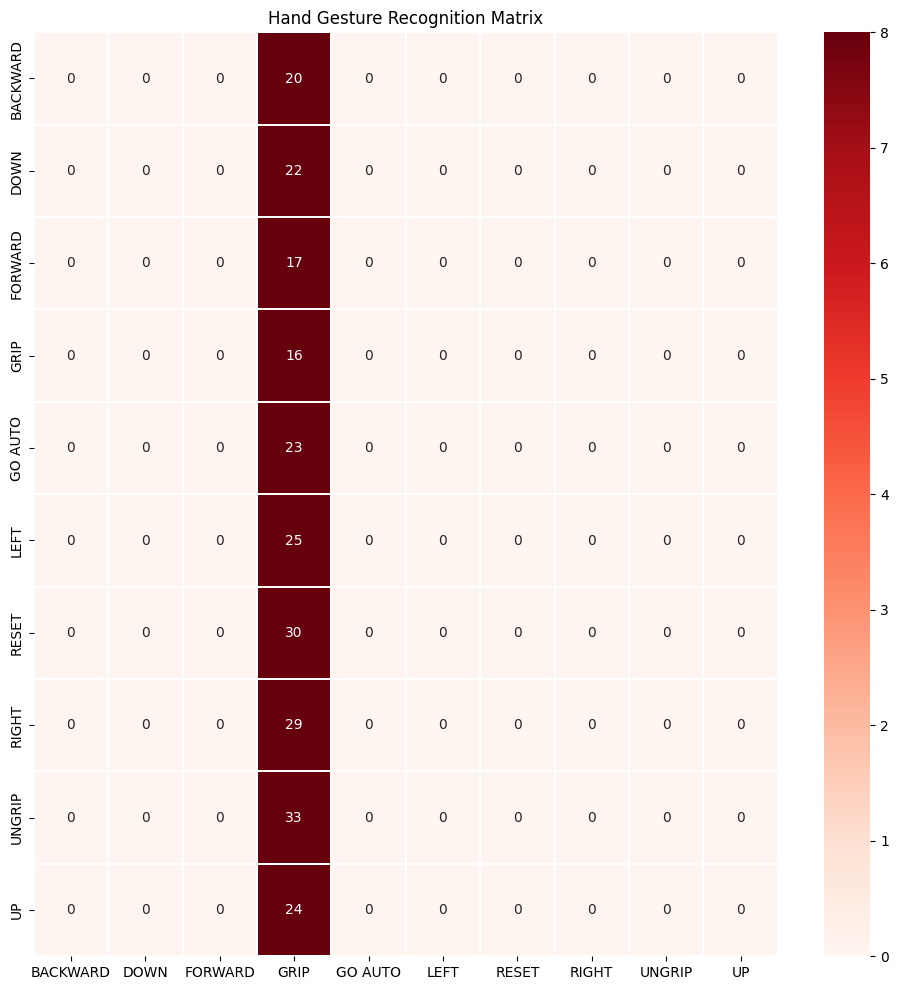

In [37]:
labels2 = sorted(list(set(df2['Output'])))
labels2 = [x.upper() for x in labels2]

fig, ax2 = plt.subplots(figsize=(12, 12))

ax2.set_title("Hand Gesture Recognition Matrix")

maping2 = sns.heatmap(cf_matrix2, 
                     annot=True,
                     cmap=plt.cm.Reds, 
                     linewidths=.2,
                     xticklabels=labels2,
                     yticklabels=labels2,
                     vmax=8,
                     fmt='g',
                     ax=ax2
                    )

# Calculate accuracy and error
total_samples2 = np.sum(cf_matrix2)
correct_predictions2 = np.trace(cf_matrix2)
accuracy2 = correct_predictions2 / total_samples2
error2 = 1 - accuracy2

# Print accuracy and error
print("Accuracy: {:.2f}%".format(accuracy2 * 100))
print("Error: {:.2f}%".format(error2 * 100))

maping2

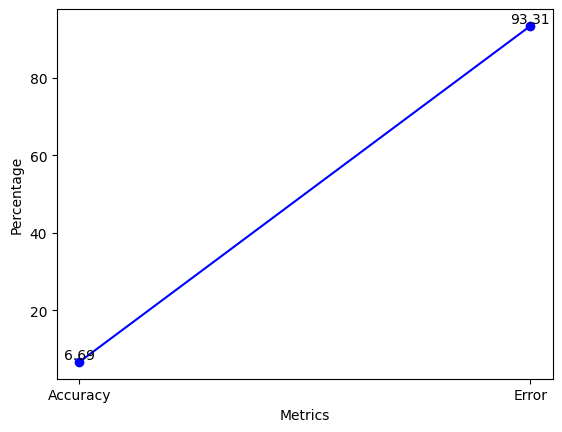

In [38]:
# Create lists for plotting
metrics2 = ["Accuracy", "Error"]
values2 = [accuracy2 * 100, error2 * 100]

# Plot the line graph
plt.plot(metrics2, values2, marker='o', linestyle='-', color='blue')

# Add labels to the data points
for i, value in enumerate(values2):
    plt.text(metrics2[i], value, str(round(value, 2)), ha='center', va='bottom')

# Set axis labels
plt.xlabel("Metrics")
plt.ylabel("Percentage")

# Display the line graph
plt.show()

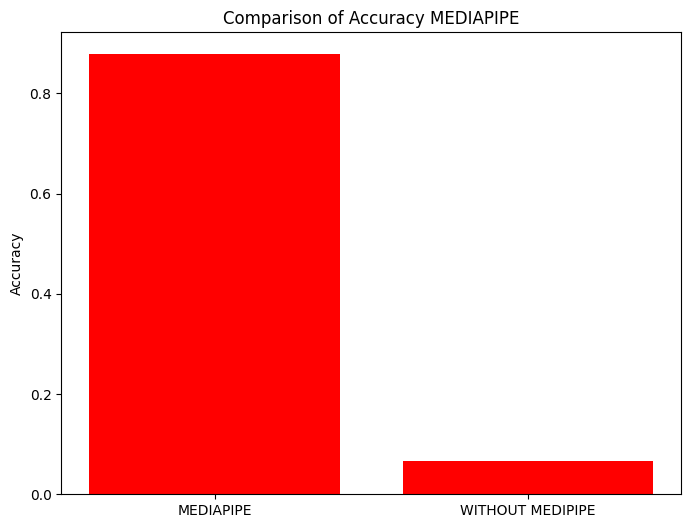

In [39]:

# Creating bar graphs for accuracy
accuracy_data = [accuracy1, accuracy2]
methods = ['MEDIAPIPE', 'WITHOUT MEDIPIPE']

plt.figure(figsize=(8, 6))
plt.bar(methods, accuracy_data, color='red')
plt.xlabel("")
plt.ylabel("Accuracy")
plt.title("Comparison of Accuracy MEDIAPIPE")

plt.show()


In [1]:
import numpy as np

# Given information
m = 81 / 1000  # Convert mass to kilograms
a1 = 75 / 1000  # Convert lengths to meters
a2 = 57 / 1000
a3 = 88 / 1000
theta1 = np.deg2rad(190)  # Convert angle to radians
d2 = 253 / 1000
d3 = 205 / 1000
X = -288.5 / 1000  # Convert Cartesian coordinates to meters
Y = -50.88 / 1000
Z = 385 / 1000
g = 9.81  # Acceleration due to gravity

# Forward kinematics equations
r = np.sqrt(X**2 + Y**2)
phi = np.arctan2(Y, X)
z = Z

# Velocities
V1 = a1 * np.sin(theta1)
V2 = d2 * (a1 * np.cos(theta1) * np.cos(phi) + a2 * np.sin(phi))
V3 = d3 * (a1 * np.cos(theta1) * np.cos(phi) + a2 * np.sin(phi) + a3 * np.cos(phi))

# Heights
h1 = a1 * np.cos(theta1)
h2 = d2 * np.sin(theta1) + a2 * np.cos(phi)
h3 = d3 * np.sin(theta1) + a2 * np.cos(phi) + a3 * np.sin(phi)

# Kinetic energy
T = 0.5 * m * (V1**2 + V2**2 + V3**2)

# Potential energy
V = m * g * (h1 + h2 + h3)

# Lagrangian
L = T - V

print("Kinetic Energy (T):", T)
print("Potential Energy (V):", V)
print("Lagrangian (L):", L)


Kinetic Energy (T): 1.807178568706395e-05
Potential Energy (V): -0.2232399130521486
Lagrangian (L): 0.22325798483783565
